## Klasifikacija malignog i benignog raka dojke koristeći algoritme strojnog učenja $\newline$- poboljšanje rezultata

Rad je preuzet s poveznice: https://ieeexplore.ieee.org/document/9445249

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Za razliku od originalne analize, svaka je metoda strojnog učenja **ponovljena N=10 puta** kako bi se usrednjila dobivena vrijednost i dobili pouzdaniji rezultati.

Osim toga, analize su isprobane na **cijelom skupu** podataka i na **reduciranom skupu** u kojemu su izbačene stršeće vrijednosti (gledajući zasebno svaku klasu).

In [2]:
N=10

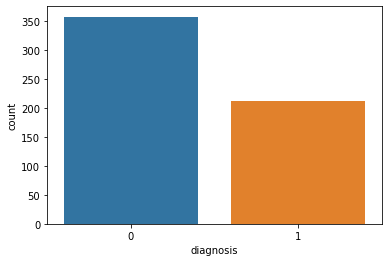

0    357
1    212
Name: diagnosis, dtype: int64


In [3]:
df = pd.read_csv('data_sanitized.csv')
sns.countplot(df['diagnosis'], label='count')
plt.show()
print(df['diagnosis'].value_counts())

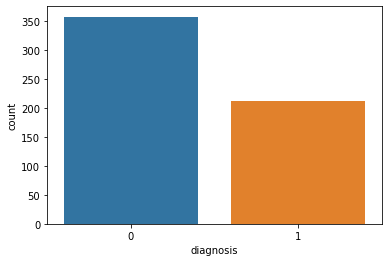

0    357
1    212
Name: diagnosis, dtype: int64


In [4]:
df = pd.read_csv('data_sanitized.csv')
sns.countplot(df['diagnosis'], label='count')
plt.show()
print(df['diagnosis'].value_counts())

Za početak **nijedan atribut nije izbačen** s obzirom na to da koeficijent korelacije iskazuje samo linearnu korelaciju, stoga njegova vrijednost blizu nuli ne indicira nužno nepostojanje korelacije. Također, trenutno korištene metode strojnog učenja rade dovoljno brzo i sa svim atributima.

In [5]:
print("# of columns:", len(df.columns.values))
print(df.columns.values)


# of columns: 31
['diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave_points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave_points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave_points_worst' 'symmetry_worst' 'fractal_dimension_worst']


Također, skup podataka je **pri svakoj iteraciji** nasumično podijeljen u skup za treniranje i skup za testiranje u omjeru 3:1

In [6]:
#split df into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
testSize = 0.25 #ubaciti svugdje

Sada ćemo redom isprobati navedene algoritme strojnog učenja, zabilježiti njihove preciznosti i naposljetku ih skupno prikazati.

### Logistička regresija

In [7]:
# logistic regression
from sklearn.linear_model import LogisticRegression
trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
  logisticRegr = LogisticRegression(max_iter=100000)
  logisticRegr.fit(X_train, y_train)
  LRaccTrain = logisticRegr.score(X_train, y_train)
  LRaccTest = logisticRegr.score(X_test, y_test)
  trainAccs.append(LRaccTrain)
  testAccs.append(LRaccTest)
print()
LRaccTrain = sum(trainAccs)/len(trainAccs)
LRaccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", LRaccTrain)
print("Average accuracy on test set:", LRaccTest)

..........
Average accuracy on training set: 0.9607981220657278
Average accuracy on test set: 0.9538461538461538


### K-Najbližih susjeda (KNN)

In [8]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

trainAccs, testAccs = [], []
ks = []
for i in range(N):
    print(".", end="")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    maxAccTrain = 0
    maxAccTest = 0
    maxk = 0
    for k in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        KNNaccTrain = knn.score(X_train, y_train)
        KNNaccTest = knn.score(X_test, y_test)
        if(KNNaccTest > maxAccTest):
            maxAccTest = KNNaccTest
            maxAccTrain = KNNaccTrain
            maxk = k
    trainAccs.append(maxAccTrain)
    testAccs.append(maxAccTest)
    ks.append(maxk)
print()
KNNaccTrain = sum(trainAccs)/len(trainAccs)
KNNaccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", KNNaccTrain)
print("Average accuracy on test set:", KNNaccTest)
#print the summary of ks
print("Summary of k values: (k - count)")
print(pd.Series(ks).value_counts())

..........
Average accuracy on training set: 0.9438967136150234
Average accuracy on test set: 0.9412587412587412
Summary of k values: (k - count)
5     2
3     2
7     2
12    1
9     1
4     1
2     1
dtype: int64


### Stablo odluke

In [9]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  treeAccTrain = tree.score(X_train, y_train)
  treeAccTest = tree.score(X_test, y_test)

  trainAccs.append(treeAccTrain)
  testAccs.append(treeAccTest)
print()
treeAccTrain = sum(trainAccs)/len(trainAccs)
treeAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", treeAccTrain)
print("Average accuracy on test set:", treeAccTest)


..........
Average accuracy on training set: 1.0
Average accuracy on test set: 0.9181818181818183


### Stablo odluke - podrezivanje

In [10]:

trainAccs, testAccs = [], []
depths = []
for i in range(N):
  print(".", end="")
  maxAccTrain = 0
  maxAccTest = 0
  for depth in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    ##prune the tree
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    
    pruneTreeAccTrain = tree.score(X_train, y_train)
    pruneTreeAccTest = tree.score(X_test, y_test)

    if(pruneTreeAccTest > maxAccTest):
      maxAccTest = pruneTreeAccTest
      maxAccTrain = pruneTreeAccTrain
      maxDepth = depth
  trainAccs.append(maxAccTrain)
  testAccs.append(maxAccTest)
  depths.append(maxDepth)

print()
pruneTreeAccTrain = sum(trainAccs)/len(trainAccs)
pruneTreeAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", pruneTreeAccTrain)
print("Average accuracy on test set:", pruneTreeAccTest)
#print the summary of depths
print("Summary of depth values: (depth - count)")
print(pd.Series(depths).value_counts())

..........
Average accuracy on training set: 0.989906103286385
Average accuracy on test set: 0.9531468531468532
Summary of depth values: (depth - count)
4    3
6    3
2    1
5    1
7    1
9    1
dtype: int64


### Naivni Bayesov klasifikator

In [11]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  nb = GaussianNB()
  nb.fit(X_train, y_train)
  nbAccTrain = nb.score(X_train, y_train)
  nbAccTest = nb.score(X_test, y_test)

  trainAccs.append(nbAccTrain)
  testAccs.append(nbAccTest)
print()
nbAccTrain = sum(trainAccs)/len(trainAccs)
nbAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", nbAccTrain)
print("Average accuracy on test set:", nbAccTest)

..........
Average accuracy on training set: 0.9443661971830986
Average accuracy on test set: 0.9335664335664335


### Slučajna šuma

In [12]:
#random forest
from sklearn.ensemble import RandomForestClassifier

trainAccs, testAccs = [], []
for i in range(N):
  print(".", end="")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  rfAccTrain = rf.score(X_train, y_train)
  rfAccTest = rf.score(X_test, y_test)

  trainAccs.append(rfAccTrain)
  testAccs.append(rfAccTest)
print()
rfAccTrain = sum(trainAccs)/len(trainAccs)
rfAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", rfAccTrain)
print("Average accuracy on test set:", rfAccTest)

..........
Average accuracy on training set: 1.0
Average accuracy on test set: 0.9545454545454545


### Slučajna šuma - podrezivanje

In [13]:

trainAccs, testAccs = [], []
depths = []
for i in range(N):
  print(".", end="")
  maxAccTrain = 0
  maxAccTest = 0
  for depth in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    ##prune the tree
    rf = RandomForestClassifier(max_depth=depth)
    rf.fit(X_train, y_train)
    
    rfPrunedAccTrain = rf.score(X_train, y_train)
    rfPrunedAccTest = rf.score(X_test, y_test)

    if(rfPrunedAccTest > maxAccTest):
      maxAccTest = rfPrunedAccTest
      maxAccTrain = rfPrunedAccTrain
      maxDepth = depth
  trainAccs.append(maxAccTrain)
  testAccs.append(maxAccTest)
  depths.append(maxDepth)

print()
rfPrunedAccTrain = sum(trainAccs)/len(trainAccs)
rfPrunedAccTest = sum(testAccs)/len(testAccs)
print("Average accuracy on training set:", rfPrunedAccTrain)
print("Average accuracy on test set:", rfPrunedAccTest)
#print the summary of depths
print("Summary of depth values: (depth - count)")
print(pd.Series(depths).value_counts())

..........
Average accuracy on training set: 0.9915492957746478
Average accuracy on test set: 0.9776223776223777
Summary of depth values: (depth - count)
7    3
3    2
5    2
6    1
9    1
4    1
dtype: int64


### Stroj potpornih vektora

In [14]:
# SVM
from sklearn.svm import SVC

methodsAccArrays = {'linear': ([], [], []), 'poly': (
    [], [], []), 'rbf': ([], [], []), 'sigmoid': ([], [], [])}

for i in range(N):
    print(".", end="")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    methodsAccLocal = {'linear': ([], [], []), 'poly': (
        [], [], []), 'rbf': ([], [], []), 'sigmoid': ([], [], [])}
    for method in methodsAccLocal.keys():
        print(",", end="")
        c = -15
        improving = 2
        while (c < 4 or improving > 0):
            improving -= 1
            svm = SVC(kernel=method, C=10**c)
            svm.fit(X_train, y_train)
            SVMaccTrain = svm.score(X_train, y_train)
            SVMaccTest = svm.score(X_test, y_test)
            if (len(methodsAccLocal[method][2]) == 0 or SVMaccTest > max(methodsAccLocal[method][2])):
                methodsAccLocal[method][0].append(c)
                methodsAccLocal[method][1].append(SVMaccTrain)
                methodsAccLocal[method][2].append(SVMaccTest)
                improving = 2
            c += 1
    for method in methodsAccLocal.keys():
        indexOfBest = methodsAccLocal[method][2].index(
            max(methodsAccLocal[method][2]))

        methodsAccArrays[method][0].append(
            methodsAccLocal[method][0][indexOfBest])
        methodsAccArrays[method][1].append(
            methodsAccLocal[method][1][indexOfBest])
        methodsAccArrays[method][2].append(
            methodsAccLocal[method][2][indexOfBest])
            
methodsAcc = {'linear': (0, 0), 'poly': (
    0, 0), 'rbf': (0, 0), 'sigmoid': (0, 0)}

# find average of all the best values
for method in methodsAccArrays.keys():
    methodsAcc[method] = (sum(methodsAccArrays[method][1])/len(
        methodsAccArrays[method][1]), sum(methodsAccArrays[method][2])/len(methodsAccArrays[method][2]))

    print(
        f"Average accuracy on training set (method={method}):", methodsAcc[method][0])
    print(
        f"Average accuracy on test set (method={method}):", methodsAcc[method][1])
    print("Summary of C values: (C - count)")
    print(pd.Series(methodsAccArrays[method][0]).value_counts(ascending=True))
    print()

bestAccMethod = None
for method in methodsAcc.keys():
    if (bestAccMethod == None or methodsAcc[method][1] > methodsAcc[bestAccMethod][1]):
        bestAccMethod = method
SVMbestAccs = (methodsAcc[bestAccMethod][0], methodsAcc[bestAccMethod][1])

.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,.,,,,Average accuracy on training set (method=linear): 0.966431924882629
Average accuracy on test set (method=linear): 0.9713286713286713
Summary of C values: (C - count)
-1    1
 5    1
 2    2
 0    2
 1    4
dtype: int64

Average accuracy on training set (method=poly): 0.9544600938967136
Average accuracy on test set (method=poly): 0.9615384615384615
Summary of C values: (C - count)
1    1
6    1
2    1
4    3
5    4
dtype: int64

Average accuracy on training set (method=rbf): 0.9612676056338028
Average accuracy on test set (method=rbf): 0.9629370629370628
Summary of C values: (C - count)
3    1
6    2
2    2
4    5
dtype: int64

Average accuracy on training set (method=sigmoid): 0.6218309859154929
Average accuracy on test set (method=sigmoid): 0.6440559440559441
Summary of C values: (C - count)
-15    10
dtype: int64



### Usporedba rezultata
Nakon treniranja algoritama, dobiveni su sljedeći rezultati:

In [15]:
# make an aligned markdown table with all the accuracies
from tabulate import tabulate
table = [['Logistic Regression', LRaccTrain, LRaccTest]
, ['KNN', maxAccTrain, maxAccTest]
, ['Decision Tree', treeAccTrain, treeAccTest]
, ['Decision Tree (pruned)', pruneTreeAccTrain, pruneTreeAccTest]
, ['Naive Bayes', nbAccTrain, nbAccTest]
, ['Random Forest', rfAccTrain, rfAccTest]
, ['Random Forest (pruned)', rfPrunedAccTrain, rfPrunedAccTest]
, ['SVM', SVMbestAccs[0], SVMbestAccs[1]]]
print(tabulate(table, headers=['Classifier',
      'Training Accuracy', 'Test Accuracy']))


Classifier                Training Accuracy    Test Accuracy
----------------------  -------------------  ---------------
Logistic Regression                0.960798         0.953846
KNN                                0.974178         0.979021
Decision Tree                      1                0.918182
Decision Tree (pruned)             0.989906         0.953147
Naive Bayes                        0.944366         0.933566
Random Forest                      1                0.954545
Random Forest (pruned)             0.991549         0.977622
SVM                                0.966432         0.971329


Rezultati dobiveni u referentnom radu su:

![](accuracy_table.png)

### Algoritam K-sredina (KMeans) 

Kao dodatnu metodu strojnog učenja, primijenili smo algoritam KMeans ili K-sredina koji za razliku od ostalih modela spada pod metode nenadziranog strojnog učenja (svi ostali modeli pripadaju nadziranom učenju). Ovaj algoritam iako podsjeća na model KNN, ipak ima jednu značajnu razliku, a to je da pošto se radi o nenadziranom učenju, algoritmu ne dajemo informaciju o stvarnim klasama modela. Umjesto toga, algoritmu predajemo _neoznačene_ primjere $\{x_i\}^N_{i=1}$ bez pripadne klase, te će ih algoritam grupirati na temelju zajedničkih karakteristika.

Taj postupak grupiranja na temelju zajedničikih karakteristika implementiran je na način da sve neoznačene primjere preslikamno u dvodimenzionalni prostor te ih grupiramo na temelju međusobne euklidske udaljenosti između određenih parova primjera. Kao kod KNN, KMeans prima argument K koji označava broj grupa (eng. _clusters_) u koje ćemo grupirati primjere. Algoritam započinje na način da u prvoj iteraciji nasumično odabere K primjera koje ćemo zvati _centroidi_. Svaki centroid označava jednu klasu. Zatim svim ostalim primjerima izračunamo euklidsku udaljenost od svakog centroida, te ih svrstamo u klasu onog centroida kojemu je primjer najbliži. Za dobivenih K klasa svakoj izračunamo "srednju točku", odnosno aritmetičku sredinu svih primjera te smo na taj način dobili novih K centroida te se isti postupak grupiranja ponavlja u idućoj iteraciji. Algoritam prestaje kada u dvije iteracije zaredom niti jedan primjer ne promijeni klasu.

Naravno, naši neoznačeni primjeri nisu dvodimenzionalni (broj značajki > 2) tako da ih moramo preslikati u dvodimenzionalni prostor. To ćemo napraviti PCA (eng. _Principal Component Analysis_) analizom kojoj je upravo to namjena.

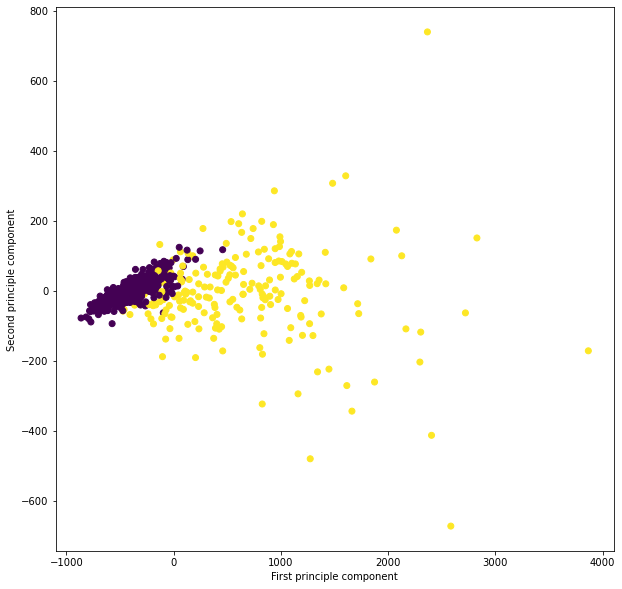

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(df)

x_pca = pca.transform(df)

plt.figure(figsize=(10, 10))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['diagnosis'])
plt.xlabel("First principle component")
plt.ylabel("Second principle component")
plt.show()

U ovom slučaju podrazumijeva se da će naš K biti jednak 2, jer u originalnom skupu podataka izlazna varijabla ima 2 klase (0 i 1 - benigni i maligni), no to ne mora uvijek biti slučaj. Kvaliteta grupiranja mjeri se inercijom ili _Inertia_, koja je realan broj dobiven računanjem distanca između svih točaka u dvodimenzionalnom (ili pak višedimenzionalnom) prostoru, a u detaljnu formulu za inerciju nećemo ulaziti. Interpretacija mjere _Inertia_ jest da kako kvaliteta K-grupiranja raste,
Inertia pada. Sljedeći graf inercije u ovisnosti o K jest samo primjer, pošto mi imamo predodređen K=2.    

In [17]:
from sklearn.cluster import KMeans
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

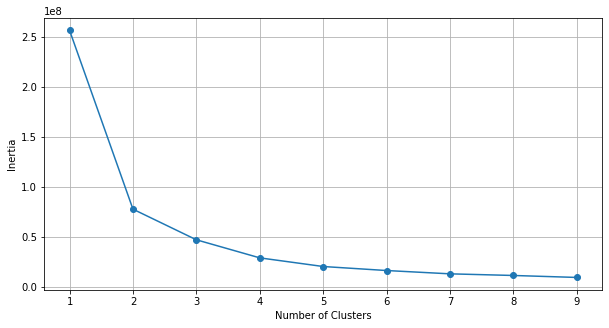

In [18]:
optimize_k_means(x_pca, 10)

Možemo primijeniti algoritam KMeans s argumentom K = 2.

Text(0.5, 1.0, 'Predicted clusters using KMeans')

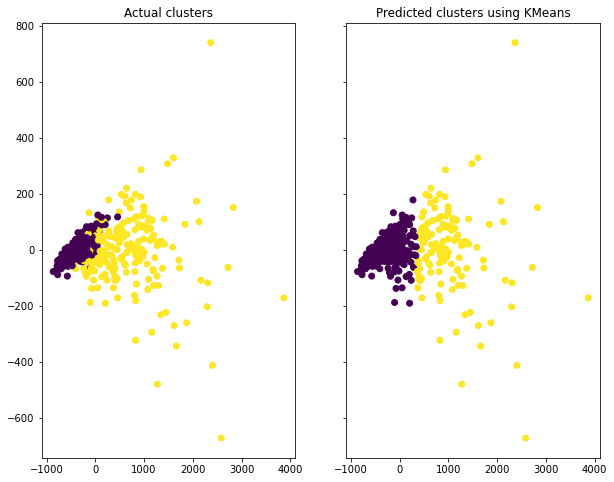

In [19]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_pca)
labels = kmeans.labels_

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 8))

ax1.scatter(x = x_pca[:,0], y = x_pca[:,1], c = df['diagnosis'])
ax2.scatter(x = x_pca[:,0], y = x_pca[:,1], c = labels)
ax1.set_title("Actual clusters")
ax2.set_title("Predicted clusters using KMeans")

Vidimo da je algoritam KMeans, unatoč tome što nije imao informaciju o stvarnoj klasi primjera, grupirao primjere dobivene PCA analizom poprilično podudarno sa stvarnim klasama tih istih primjera u originalnom skupu podataka.

Uspješnost algoritma KMeans možemo izmjeriti Randovim indeksom.

In [21]:
from sklearn.metrics import rand_score

print("Rand score for Kmeans (K=2) = " + str(rand_score(df['diagnosis'], labels)))

Rand score for Kmeans (K=2) = 0.7503774845912028
